In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import numpy as np

In [3]:
df = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")

In [4]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
df["PassengerId"][0][0:4]

'0001'

In [6]:
df["Passengergroup"] = df["PassengerId"].apply(lambda x:int(x[0:4]))
test["Passengergroup"] = test["PassengerId"].apply(lambda x:int(x[0:4]))
PassenderID = test["PassengerId"]
df.drop(['PassengerId'],axis=1,inplace=True)
test.drop(['PassengerId'],axis=1,inplace=True)

In [7]:
df.HomePlanet.unique()

array(['Europa', 'Earth', 'Mars', nan], dtype=object)

In [8]:
df.isna().sum()

HomePlanet        201
CryoSleep         217
Cabin             199
Destination       182
Age               179
VIP               203
RoomService       181
FoodCourt         183
ShoppingMall      208
Spa               183
VRDeck            188
Name              200
Transported         0
Passengergroup      0
dtype: int64

In [9]:
df["HomePlanet"].value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [10]:
df["Destination"].value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

In [11]:
df[["Destination","HomePlanet"]].value_counts()

Destination    HomePlanet
TRAPPIST-1e    Earth         3101
               Mars          1475
               Europa        1189
55 Cancri e    Europa         886
PSO J318.5-22  Earth          712
55 Cancri e    Earth          690
               Mars           193
PSO J318.5-22  Mars            49
               Europa          19
dtype: int64

In [12]:
df.dropna(thresh=2,inplace=True)

In [13]:
df.dropna(subset=["Name"],inplace=True)

In [14]:
test.isna().sum()

HomePlanet         87
CryoSleep          93
Cabin             100
Destination        92
Age                91
VIP                93
RoomService        82
FoodCourt         106
ShoppingMall       98
Spa               101
VRDeck             80
Name               94
Passengergroup      0
dtype: int64

In [15]:
df["FamName"]=df["Name"].apply(lambda x: x.split(" ")[-1])
#test["FamName"] = test["Name"].apply(lambda x: x.split(" ")[-1])
df.drop(['Name'],axis=1,inplace=True)
#test.drop(['Name'],axis=1,inplace=True)

In [16]:
test_name_null_index = list(test[test["Name"].isna()].index)

In [17]:
test['Name'][test_name_null_index].isna().sum()

94

In [18]:
non_null_names=[]
for i in range(len(test["Name"])):
  if i not in test_name_null_index:
    non_null_names.append(i)

In [19]:
for i in non_null_names:
  test['Name'][i] = test['Name'][i].split(" ")[-1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [20]:
test['Name'][(test['Passengergroup']==test['Passengergroup'][8])].mode()

0    Pringry
dtype: object

In [21]:
test['Name'].fillna("a",inplace=True)

In [22]:
test['Name'][test_name_null_index].isna().sum()

0

In [42]:
test.loc[[164]]

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Passengergroup
164,Europa,False,C/8/P,55 Cancri e,54.0,False,0.0,8.0,4391.0,4882.0,7.0,0 Stranbeate 1 a dtype: object,344


In [35]:
test['Name'][(test['Passengergroup']==test['Passengergroup'][164])].mode()[0]

ValueError: ignored

In [32]:
for i in test_name_null_index:
  print(i)
  print(test['Name'][(test['Passengergroup']==test['Passengergroup'][i])].mode()[0])

19
Prucerod
114
0    a
dtype: object
140
0    a
dtype: object
164


ValueError: ignored

In [154]:
test['FamName'] = test['Name']
test.drop(['Name'],axis=1,inplace=True)

In [156]:
test.head(20)

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Passengergroup,FamName
0,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,13,NaN
1,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,18,NaN
2,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,19,NaN
3,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,21,NaN
4,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,23,NaN
5,Earth,False,F/7/P,TRAPPIST-1e,31.0,False,0.0,1615.0,263.0,113.0,60.0,27,NaN
6,Europa,True,B/2/P,55 Cancri e,21.0,False,0.0,NaN,0.0,0.0,0.0,29,NaN
7,Europa,True,D/0/S,TRAPPIST-1e,20.0,False,0.0,0.0,0.0,0.0,0.0,32,NaN
8,Europa,True,D/0/S,55 Cancri e,23.0,False,0.0,0.0,0.0,0.0,0.0,32,NaN
9,Earth,False,F/7/S,55 Cancri e,24.0,False,0.0,639.0,0.0,0.0,0.0,33,NaN


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
Name_Encoder = LabelEncoder()

In [ ]:
df["FamName"]=Name_Encoder.fit_transform(df["FamName"])
test["FamName"]=Name_Encoder.fit_transform(test["FamName"])

In [ ]:
home_missing_index= list(df[df["HomePlanet"].isna()].index)
test_home_missing_index = list(test[test['HomePlanet'].isna()].index)

In [ ]:
for i in home_missing_index:
  
  df['HomePlanet'][i] = df['HomePlanet'][(df['Passengergroup']==df['Passengergroup'][i])].mode()

for i in test_home_missing_index:
  test['HomePlanet'][i] = test['HomePlanet'][(test['Passengergroup']==test['Passengergroup'][i])].mode()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-package

In [ ]:
destination_missing_index=df[df["Destination"].isnull()]
destination_missing_index=list(destination_missing_index.index)
test_destination_missing_index = list(test[test['Destination'].isna()].index)
for i in destination_missing_index:
  
  df['Destination'][i] = df['Destination'][(df['Passengergroup']==df['Passengergroup'][i])].mode()

for i in test_destination_missing_index:
  
  test['Destination'][i] = test['Destination'][(test['Passengergroup']==test['Passengergroup'][i])].mode()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
df['HomePlanet'].isna().sum()

0

In [ ]:
df.isna().sum()

HomePlanet          0
CryoSleep         207
Cabin             197
Destination         0
Age               176
VIP               202
RoomService       180
FoodCourt         178
ShoppingMall      204
Spa               177
VRDeck            184
Transported         0
Passengergroup      0
FamName             0
dtype: int64

In [ ]:
test.isna().sum()

HomePlanet          0
CryoSleep          93
Cabin             100
Destination         0
Age                91
VIP                93
RoomService        82
FoodCourt         106
ShoppingMall       98
Spa               101
VRDeck             80
Passengergroup      0
FamName             0
dtype: int64

In [ ]:
test_cabin_missing_index = list(test[test["Cabin"].isna()].index)
for i in test_cabin_missing_index:
  test["Cabin"][i] = test["Cabin"][(test["Passengergroup"]==test["Passengergroup"][i])].mode()

Series([], dtype: object)


ValueError: ignored

In [ ]:
test_cabin_missing_index

[18,
 99,
 135,
 147,
 180,
 184,
 241,
 263,
 344,
 358,
 422,
 544,
 713,
 732,
 825,
 832,
 1020,
 1030,
 1046,
 1098,
 1155,
 1177,
 1196,
 1204,
 1243,
 1329,
 1476,
 1555,
 1564,
 1588,
 1671,
 1745,
 1761,
 1859,
 1916,
 2024,
 2029,
 2038,
 2136,
 2221,
 2252,
 2275,
 2288,
 2300,
 2315,
 2332,
 2346,
 2377,
 2410,
 2441,
 2483,
 2492,
 2500,
 2538,
 2647,
 2746,
 2780,
 2870,
 2908,
 2961,
 2968,
 2972,
 3016,
 3018,
 3021,
 3054,
 3097,
 3160,
 3203,
 3205,
 3243,
 3247,
 3282,
 3317,
 3368,
 3389,
 3411,
 3416,
 3421,
 3466,
 3552,
 3584,
 3629,
 3648,
 3649,
 3779,
 3799,
 3864,
 3885,
 4097,
 4129,
 4141,
 4176,
 4178,
 4183,
 4209,
 4248,
 4249,
 4258,
 4273]

In [ ]:
df= df.dropna(subset=['Cabin'])

In [ ]:
test['Cabin']=test['Cabin'].astype(str)

In [ ]:
test.isna().sum()

HomePlanet          0
CryoSleep          93
Cabin               0
Destination         0
Age                91
VIP                93
RoomService        82
FoodCourt         106
ShoppingMall       98
Spa               101
VRDeck             80
Passengergroup      0
FamName             0
dtype: int64

In [ ]:
df["cabin_deck"] = df['Cabin'].apply(lambda x:x[0])
df["cabin_side"] = df['Cabin'].apply(lambda x:x[-1])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
test["cabin_deck"] = test['Cabin'].apply(lambda x:x[0])

In [ ]:
test["cabin_side"] = test['Cabin'].apply(lambda x:x[-1])

In [ ]:
test["cabin_side"].head()

0    S
1    S
2    S
3    S
4    S
Name: cabin_side, dtype: object

In [ ]:
print(len(test['Cabin']))
print(len(test['cabin_deck']))
print(len(test['cabin_side']))

4277
4277
4277


In [ ]:
df.drop(['Cabin'],axis=1,inplace=True)
test.drop(['Cabin'],axis=1,inplace=True)

In [ ]:
df[['CryoSleep','Transported']].value_counts()

CryoSleep  Transported
False      False          3492
True       True           2366
False      True           1713
True       False           525
dtype: int64

In [ ]:
df["CryoSleep"]=df["CryoSleep"].fillna(df["Transported"])

In [ ]:
test['CryoSleep']= test['CryoSleep'].apply(lambda x:1 if x==True else 0)

In [ ]:
test_cryo_missing_index =  list(test[test['CryoSleep'].isna()].index)

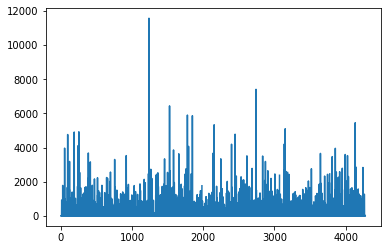

In [ ]:
plt.plot(test['RoomService'])

In [ ]:
col = ['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']

In [ ]:
for cols in col:
  print(cols,end=" :  ")
  print(test['CryoSleep'].corr(test[cols]))

Age :  -0.049921555913914235
RoomService :  -0.2721840434891719
FoodCourt :  -0.21617528161508937
ShoppingMall :  -0.23769189259820744
Spa :  -0.20332864576114912
VRDeck :  -0.18729204284133882


In [ ]:
a=test[test['RoomService']<1500]

In [ ]:
a['CryoSleep'].corr(a['RoomService'])

-0.328221522262744

In [ ]:
for i in test_cryo_missing_index:
  if test['RoomService'][i]<1500:
    test['CryoSleep'][i] = 1
  else:
    test['CryoSleep'][i] = 0

In [ ]:
df.isna().sum()

HomePlanet          0
CryoSleep           0
Destination         0
Age               172
VIP               196
RoomService       176
FoodCourt         173
ShoppingMall      202
Spa               175
VRDeck            180
Transported         0
Passengergroup      0
FamName             0
cabin_deck          0
cabin_side          0
dtype: int64

In [ ]:
test.isna().sum()

HomePlanet          0
CryoSleep           0
Destination         0
Age                91
VIP                93
RoomService        82
FoodCourt         106
ShoppingMall       98
Spa               101
VRDeck             80
Passengergroup      0
FamName             0
cabin_deck          0
cabin_side          0
dtype: int64

In [ ]:
df[['VIP','Transported']].value_counts()

VIP    Transported
False  True           4004
       False          3906
True   False           118
       True             72
dtype: int64

In [ ]:
df['VIP']=df["VIP"].fillna(False)
test['VIP'] = test['VIP'].fillna(False)

In [ ]:
num_cols = ['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']

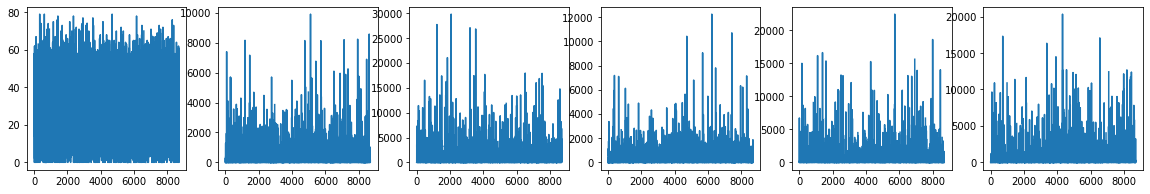

In [ ]:
plt.figure(figsize=(20,3))
for i,cols in enumerate(num_cols):
  plt.subplot(1,6,i+1)
  plt.plot(df[cols])

In [ ]:
for cols in num_cols:
  df[cols]=df[cols].fillna(df[cols].mean())
  test[cols]=test[cols].fillna(test[cols].mean())

In [ ]:
df.isna().sum()

HomePlanet        0
CryoSleep         0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
Passengergroup    0
FamName           0
cabin_deck        0
cabin_side        0
dtype: int64

In [ ]:
test.isna().sum()

HomePlanet        0
CryoSleep         0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Passengergroup    0
FamName           0
cabin_deck        0
cabin_side        0
dtype: int64

In [ ]:
df['Age_group']=np.nan
df.loc[df['Age']<=12,'Age_group']='Age_0-12'
df.loc[(df['Age']>12) & (df['Age']<18),'Age_group']='Age_13-17'
df.loc[(df['Age']>=18) & (df['Age']<=25),'Age_group']='Age_18-25'
df.loc[(df['Age']>25) & (df['Age']<=30),'Age_group']='Age_26-30'
df.loc[(df['Age']>30) & (df['Age']<=50),'Age_group']='Age_31-50'
df.loc[df['Age']>50,'Age_group']='Age_51+'

In [ ]:
test['Age_group']=np.nan
test.loc[test['Age']<=12,'Age_group']='Age_0-12'
test.loc[(test['Age']>12) & (test['Age']<18),'Age_group']='Age_13-17'
test.loc[(test['Age']>=18) & (test['Age']<=25),'Age_group']='Age_18-25'
test.loc[(test['Age']>25) & (test['Age']<=30),'Age_group']='Age_26-30'
test.loc[(test['Age']>30) & (test['Age']<=50),'Age_group']='Age_31-50'
test.loc[test['Age']>50,'Age_group']='Age_51+'

In [ ]:
df["HomePlanet"]=df["HomePlanet"].astype(str)
test["HomePlanet"]=test["HomePlanet"].astype(str)

In [ ]:
home_encoder = LabelEncoder()
df["HomePlanet"] = home_encoder.fit_transform(df["HomePlanet"])
test["HomePlanet"] = home_encoder.fit_transform(test["HomePlanet"])

In [ ]:
df['money'] = (df['RoomService']+	df['FoodCourt']+	df['ShoppingMall']+df['Spa']+df['VRDeck']	)

In [ ]:
test['money'] = (test['RoomService']+	test['FoodCourt']+	test['ShoppingMall']+test['Spa']+test['VRDeck']	)

In [ ]:
cat_encoder = LabelEncoder()
cat_cols = ['Destination','cabin_deck','cabin_side','Age_group']
for cols in cat_cols:
  df[cols] = df[cols].astype(str)
  df[cols] = cat_encoder.fit_transform(df[cols])
  test[cols] = test[cols].astype(str)
  test[cols] = cat_encoder.fit_transform(test[cols])

In [ ]:
Bool_cols = ['CryoSleep','VIP']
Bool_encoder = LabelEncoder()
for cols in Bool_cols:
  df[cols] = Bool_encoder.fit_transform(df[cols])
df['Transported'] = df['Transported'].apply(lambda x:1 if x==True else 0)

In [ ]:
test['VIP'] = test['VIP'].apply(lambda x:1 if x==True else 0)

In [ ]:
df['spent'] = df['money'].apply(lambda x:1 if x>0 else 0)
test['spent'] = test['money'].apply(lambda x:1 if x>0 else 0)

In [ ]:
#df.drop(['VIP'],axis=1,inplace=True)
#test.drop(['VIP'],axis=1,inplace=True)

In [ ]:
#df.drop(['Age'],axis=1,inplace=True)
#test.drop(['Age'],axis=1,inplace=True)

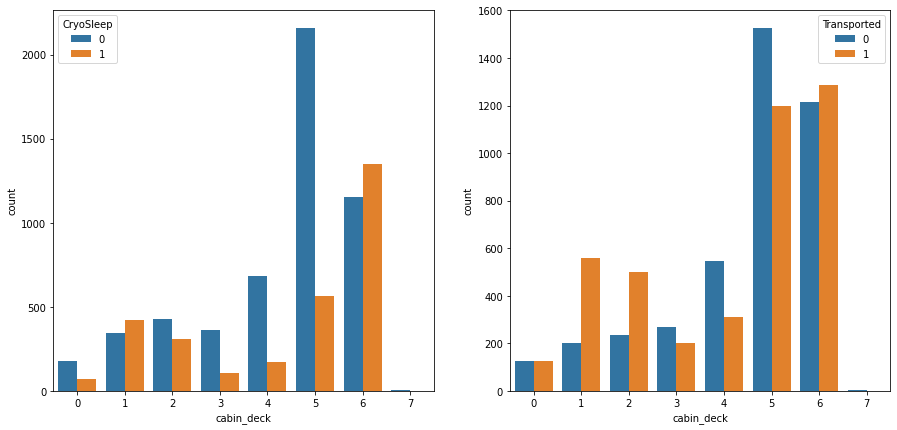

In [ ]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
sns.countplot(data=df,x='cabin_deck',hue= 'CryoSleep')
plt.subplot(1,2,2)
sns.countplot(data=df,x='cabin_deck',hue= 'Transported')

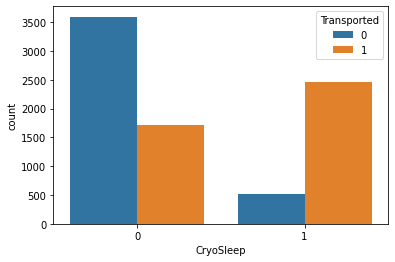

In [ ]:
sns.countplot(data=df,x='CryoSleep',hue= 'Transported')

In [ ]:
num_cols.append('money')

In [ ]:
df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Passengergroup,FamName,cabin_deck,cabin_side,Age_group,money,spent
0,5,0,8,39.0,0,0.0,0.0,0.0,0.0,0.0,0,1,1431,1,0,4,0.0,0
1,4,0,8,24.0,0,109.0,9.0,25.0,549.0,44.0,1,2,2109,5,1,2,736.0,1
2,5,0,8,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,3,1990,0,1,5,10383.0,1
3,5,0,8,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,3,1990,0,1,4,5176.0,1
4,4,0,8,16.0,0,303.0,70.0,151.0,565.0,2.0,1,4,1778,5,1,1,1091.0,1


In [ ]:
test.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Passengergroup,FamName,cabin_deck,cabin_side,Age_group,money,spent
0,3,1,8,27.0,0,0.0,0.0,0.0,0.0,0.0,13,0,7,2,3,0.0,0
1,3,0,8,19.0,0,0.0,9.0,0.0,2823.0,0.0,18,0,6,2,2,2832.0,1
2,4,1,5,31.0,0,0.0,0.0,0.0,0.0,0.0,19,0,3,2,4,0.0,0
3,4,0,8,38.0,0,0.0,6652.0,0.0,181.0,585.0,21,0,3,2,4,7418.0,1
4,3,0,8,20.0,0,10.0,0.0,635.0,0.0,0.0,23,0,6,2,2,645.0,1


In [ ]:
y = df["Transported"]


In [ ]:
df.drop(['Transported'],axis=1,inplace=True)

In [ ]:
df.shape

(8296, 17)

In [ ]:
#num_cols.remove('Age')

In [ ]:
num_cols

['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'money']

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
Scaler = StandardScaler()
MinMaxScale = MinMaxScaler((-1,1))
df[num_cols] = Scaler.fit_transform(df[num_cols])
test[num_cols] = Scaler.fit_transform(test[num_cols])

In [ ]:
df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Passengergroup,FamName,cabin_deck,cabin_side,Age_group,money,spent
0,5,0,8,0.710271,0,-0.349845,-0.285742,-0.314412,-0.275823,-0.273579,1,1431,1,0,4,-0.528508,0
1,4,0,8,-0.337886,0,-0.177488,-0.280124,-0.268918,0.217438,-0.233876,2,2109,5,1,2,-0.262442,1
2,5,0,8,2.037936,1,-0.281851,1.946380,-0.314412,5.757415,-0.229364,3,1990,0,1,5,3.224979,1
3,5,0,8,0.291008,0,-0.349845,0.515101,0.360720,2.715190,-0.099425,3,1990,0,1,4,1.342632,1
4,4,0,8,-0.896903,0,0.129275,-0.242048,-0.039628,0.231814,-0.271774,4,1778,5,1,1,-0.134108,1


In [ ]:
'''
from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder()
enc_df=pd.DataFrame(enc.fit_transform(df[enc_columns]).toarray())
enc_test=pd.DataFrame(enc.fit_transform(test[enc_columns]).toarray())
df.drop(enc_columns,axis=1,inplace=True)
test.drop(enc_columns,axis=1,inplace=True)
df = df.join(enc_df)
test= test.join(enc_test)
'''

'\nfrom sklearn.preprocessing import OneHotEncoder\nenc=OneHotEncoder()\nenc_df=pd.DataFrame(enc.fit_transform(df[enc_columns]).toarray())\nenc_test=pd.DataFrame(enc.fit_transform(test[enc_columns]).toarray())\ndf.drop(enc_columns,axis=1,inplace=True)\ntest.drop(enc_columns,axis=1,inplace=True)\ndf = df.join(enc_df)\ntest= test.join(enc_test)\n'

In [ ]:
df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Passengergroup,FamName,cabin_deck,cabin_side,Age_group,money,spent
0,5,0,8,0.710271,0,-0.349845,-0.285742,-0.314412,-0.275823,-0.273579,1,1431,1,0,4,-0.528508,0
1,4,0,8,-0.337886,0,-0.177488,-0.280124,-0.268918,0.217438,-0.233876,2,2109,5,1,2,-0.262442,1
2,5,0,8,2.037936,1,-0.281851,1.946380,-0.314412,5.757415,-0.229364,3,1990,0,1,5,3.224979,1
3,5,0,8,0.291008,0,-0.349845,0.515101,0.360720,2.715190,-0.099425,3,1990,0,1,4,1.342632,1
4,4,0,8,-0.896903,0,0.129275,-0.242048,-0.039628,0.231814,-0.271774,4,1778,5,1,1,-0.134108,1


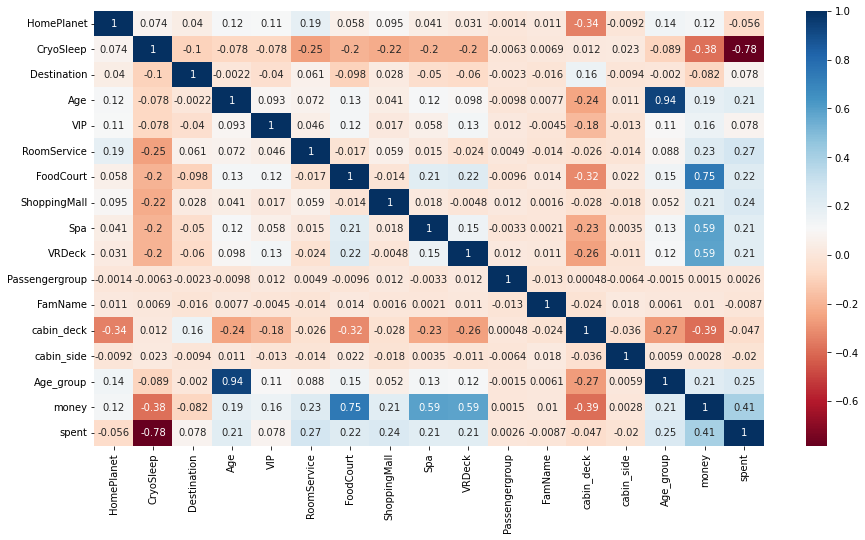

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),cmap='RdBu',annot=True)

In [ ]:
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
import xgboost as xgb

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_val,y_train,y_val=train_test_split(df,y,test_size=0.2,shuffle=True)

In [ ]:
xgb_model = xgb.XGBClassifier(max_depth=3,n_estimators=100)
xgb_model.fit(X_train,y_train)
y_pred = xgb_model.predict(X_val)
mse = mean_squared_error(y_pred,y_val)
acc = accuracy_score(y_pred,y_val)
print(f'mse: {mse}  accuracy:{acc}')

mse: 0.19698795180722892  accuracy:0.803012048192771


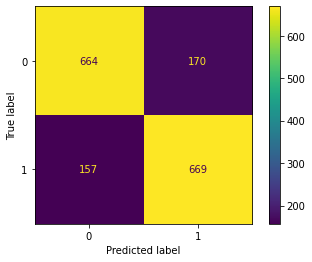

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_val,y_pred)
cm_disp = ConfusionMatrixDisplay(cm)
cm_disp.plot()


In [ ]:
import lightgbm

In [ ]:
LGBM = lightgbm.LGBMClassifier(n_estimators=100,objective='binary')
LGBM.fit(X_train,y_train)
y_pred = LGBM.predict(X_val)
mse = mean_squared_error(y_pred,y_val)
acc = accuracy_score(y_pred,y_val)
print("LGBM\n")
print(f'mse: {mse}  accuracy:{acc}')

LGBM

mse: 0.1897590361445783  accuracy:0.8102409638554217


In [ ]:
ada_model = AdaBoostClassifier()
ada_model.fit(X_train,y_train)
y_pred = ada_model.predict(X_val)
mse = mean_squared_error(y_pred,y_val)
acc = accuracy_score(y_pred,y_val)
print(f'mse: {mse}  accuracy:{acc}')

mse: 0.21385542168674698  accuracy:0.786144578313253


In [ ]:
LGBM.fit(df,y)

LGBMClassifier(objective='binary')

In [ ]:
test_y_pred = LGBM.predict(test)


In [ ]:
out = pd.DataFrame([PassenderID,test_y_pred])

In [ ]:
out = out.T
out=out.rename(columns ={'Unnamed 0':'Transported'})
out.head()

,PassengerId,Transported
0,0013_01,0
1,0018_01,0
2,0019_01,1
3,0021_01,1
4,0023_01,0


In [ ]:
out.shape

(4277, 2)

In [ ]:
for i in range(len(out['Transported'])):
  if out['Transported'][i]==1:
    out['Transported'][i]='True'
  else:
    out['Transported'][i]='False'

In [ ]:
out.head()

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False


In [ ]:
out.to_csv('prediction_LGBM_v3.csv',index=False)